In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_import = pd.read_csv('clean_data.csv')
data_import.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Length OD,Street,City,State,Zip Code,Order Price
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,14,136 Church St,New York City,NY,10001,1700.00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,14,562 2nd St,New York City,NY,10001,600.00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,14,277 Main St,New York City,NY,10001,11.95
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,14,410 6th St,San Francisco,CA,94016,149.99
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,14,43 Hill St,Atlanta,GA,30301,11.95


## States
### - Orders per state in 2019
### - Income per state in 2019
### - Monthly orders in USA in 2019

## Orders per State in 2019

Text(0.5, 1.02, 'Orders per State')

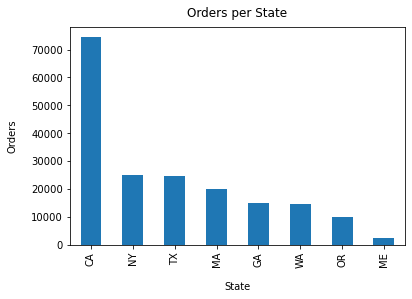

In [3]:
data_import['State'].value_counts().plot(kind='bar')
plt.xlabel("State", labelpad=14)
plt.ylabel("Orders", labelpad=14)
plt.title("Orders per State", y=1.02)

## Income per State 2019

In [4]:
data_import_grp = data_import.groupby(['State'])['Order Price'].sum().reset_index()
data_import_grp.head()

,State,Order Price
0,CA,13711289.84
1,GA,2795498.58
2,MA,3660315.12
3,ME,449758.27
4,NY,4662976.81


Text(0.5, 1.02, 'Income per State')

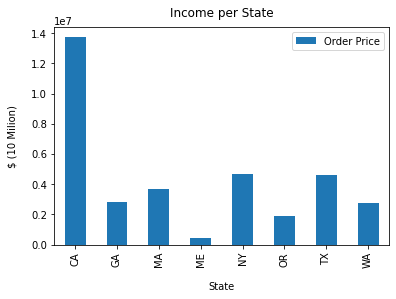

In [5]:
data_import_grp.plot.bar(x='State', y='Order Price')
plt.xlabel("State", labelpad=14)
plt.ylabel("$ (10 Milion)", labelpad=14)
plt.yticks=(range(len(data_import.index)))
plt.title("Income per State", y=1.02)

## Monthly Orders in USA

In [6]:
data_import['Month'] = pd.DatetimeIndex(data_import['Order Date']).month
Month_data = pd.Series(data_import.Month.value_counts().sort_index(ascending = True))

Text(0.5, 1.02, 'Monthly orders')

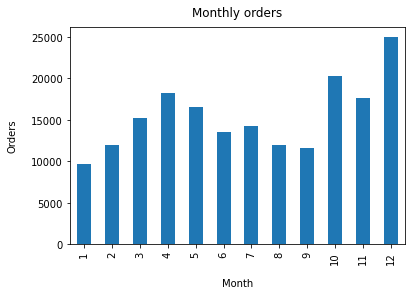

In [7]:
Month_data.plot(kind='bar')
plt.xlabel("Month", labelpad=14)
plt.ylabel("Orders", labelpad=14)
plt.title("Monthly orders", y=1.02)

# Products
### - Products per state
### - Top sales

## Product per State

In [16]:
pivot = pd.pivot_table(data_import,index=["Product"],columns=['State'], values=["Quantity Ordered"],aggfunc=sum, fill_value=0)
pivot = pivot["Quantity Ordered"].astype(int)

Text(68.99999999999999, 0.5, 'State')

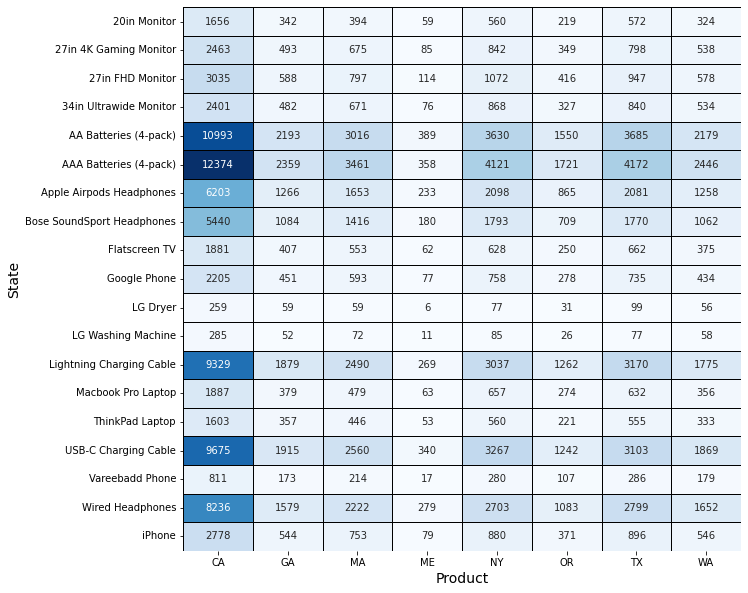

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(pivot, cmap="Blues", linewidths=.5,linecolor="Black", cbar=False, annot=True, fmt="d")
ax.set_xlabel("Product",size=14)
ax.set_ylabel("State", size=14)

## Top Sales

In [11]:
Products = data_import.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by="Quantity Ordered", ascending=False)
Products.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31012
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23971
12,Lightning Charging Cable,23211
17,Wired Headphones,20553


## Other insights

In [15]:
Average_order_price = data_import['Order Price'].mean()
template = "The average order price is {0:.2f}"
template.format(Average_order_price)

'The average order price is 185.48'